In [1]:
from scipy.stats import f, norm
import matplotlib.pyplot as plt
import numpy as np

# Распределение Фишера


In [2]:
dfn, dfd = 8, 7 #dfn, dfd -- параметры распредиления Фишера

Сгенерируем из распределения Фишера выборку объёма 1000, построем гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины (как было сказано в первой части задания).

In [3]:
random_f = f.rvs(dfn, dfd, size=1000) #выборка объёма 1000 с Ф-распределения.

In [4]:
random_f

array([ 0.32542374,  1.71589221,  2.29991132,  2.53950665,  0.51563329,
        0.34258356,  1.48891909,  0.37344452,  0.53896765,  0.63196417,
        0.71213984,  2.98411068,  1.628921  ,  1.86042064,  0.52253488,
        3.49255054,  0.40348205,  0.40810656,  0.81739693,  2.07277658,
        1.49004611,  0.67519599,  1.70181625,  1.50364088,  2.14872598,
        1.19366932,  0.74910962,  0.32752714,  0.79918443,  1.32290452,
        0.23959879,  3.1787088 ,  1.4138263 , 10.73971848,  1.56757829,
        1.31634674,  0.58345285,  1.18837389,  0.98752981,  0.14261443,
        1.79700548,  0.95559476,  1.34066786,  1.61027168,  1.75541846,
        1.02695562,  0.73011166,  1.14491856,  1.74545492,  2.65811776,
        0.97455589,  3.46799698,  0.80508397,  0.39312607,  0.28611175,
        0.86236663,  0.50794024,  1.61010867,  0.33188381,  2.00144181,
        0.71267324,  2.30712276,  0.57057343,  1.32748605,  0.45966937,
        0.65417396,  6.00884164,  0.38371258,  0.82659075,  0.61

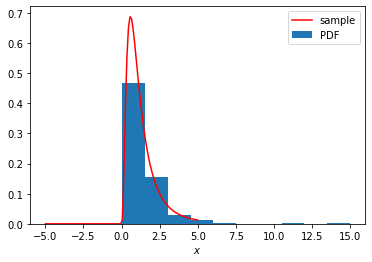

In [5]:
x = np.linspace(-5,5,100)
rv = f(dfn, dfd)
pdf = rv.pdf(x)
plt.hist(random_f, density=True, label="PDF")
plt.plot(x, pdf, label="sample", color="r")
plt.legend()

plt.xlabel('$x$')
plt.show()


Теперь реализуем вторую часть задачи.

mean_and_variance - возвращает стандартное отклонение и математическое ожидание (это параметры для нормального распределения).

In [6]:
def mean_and_variance(d1, d2, n): #takes F-distribution parameters
    mean = d2 / (d2 - 2)
    variance = 2 * d2**2 * (d1 + d2 - 2) / (d1 * (d2 - 2)**2 * (d2 - 4))
    return (mean, np.sqrt(variance/n))
    
    

vub_function - метод, который возвращает "матрицу", в которой имеется информация о 1000 выборок объёма 5, 10, 50 и 100 (для примера).

In [7]:
def vub_function(n, number_of_samples=1000):
    sample = np.zeros((number_of_samples, n)) #создаем нулевую матрицу соответствующего размера и по ходу цыкла заполняем ёё.
    for i in range(number_of_samples):
        sample[i] = f.rvs(dfn, dfd, size=n)
    return sample

finel_f - конечная функция, которая, в зависимости от параметра n, рисует соответствующую гистограмму и график плотности нормального распредиления с параметрамы, которые мы получили с помощью метода mean_and_variance.

In [8]:
def final_f(n):
    result = np.mean(vub_function(n), axis = 1) # Выборочные средние
    mean, variance = mean_and_variance(dfn, dfd, n) #Параметры для нормального распредиления
    plt.figure(figsize=(15, 8))
    plt.hist(result, bins=20, density=True, label='Sample')
    plt.plot(x, norm.pdf(x, mean, variance), label='PDF Gauss')
    plt.xlabel('$x$')
    plt.legend(loc='best', frameon=False)
    print("стандартное отклонение", variance)
    print("среднее:", mean)

Теперь всё готово для того, чтобы проверить работу центральной предельной теоремы.

# n = 5

стандартное отклонение 0.651664535375884
среднее: 1.4


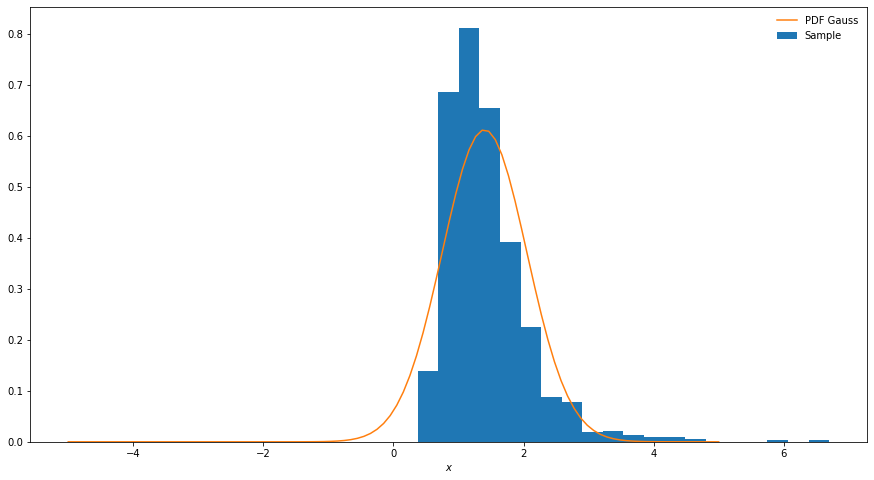

In [9]:
final_f(5)

# n = 10

стандартное отклонение 0.4607964120230683
среднее: 1.4


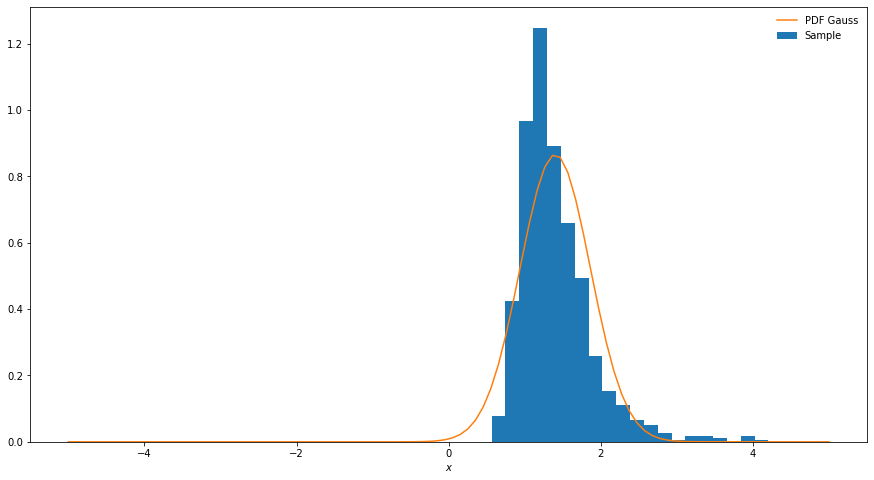

In [10]:
final_f(10)

# n = 50

стандартное отклонение 0.20607442021431643
среднее: 1.4


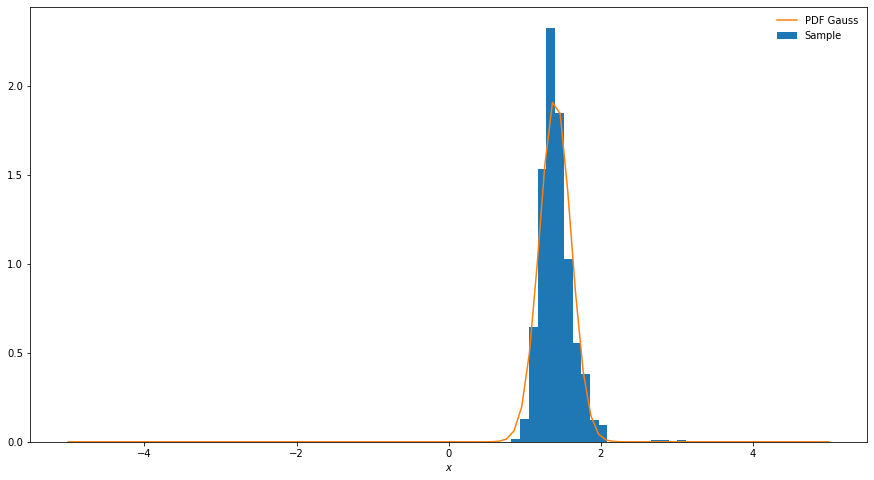

In [11]:
final_f(50)

стандартное отклонение 0.1457166199626293
среднее: 1.4


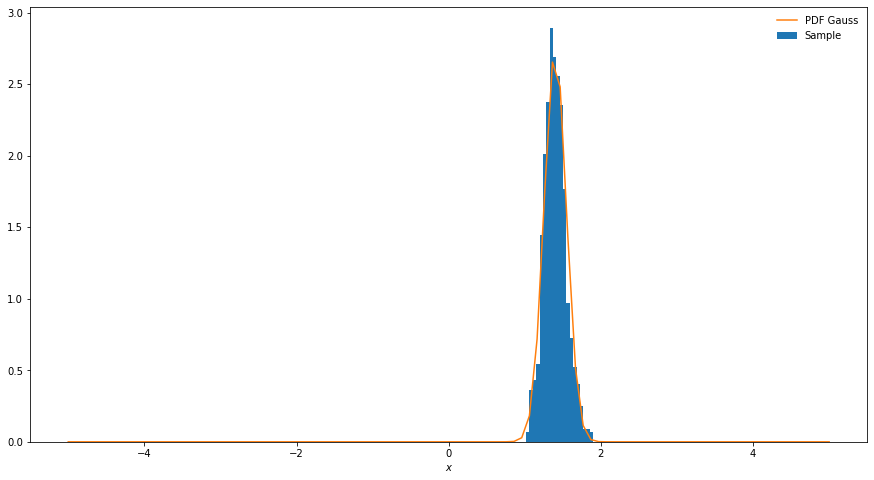

In [12]:
final_f(100)

# Выводы:

Видим, что наша робота подтверждает суть центральной предельной теоремы. И нормальное распредиления с увеличением n всё лучше описывает выборочные средние из распределения Фишера.